### Task 1: Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd

# Load the dataset
mushrooms = pd.read_csv('mushroom.csv')

In [4]:
# Display the first few rows of the dataset
print(mushrooms.head())

   class cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0   1167    sunken       scaly     white      no  anise      descending   
1   1037    sunken     fibrous       red      no  anise         notched   
2    309      flat     grooves    purple     yes   foul      descending   
3    282      bell       scaly      pink     yes  fishy         notched   
4    820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat    class.1 stalk_height  \
0 

In [5]:
# Display the summary of the dataset
print(mushrooms.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
# Check for missing values
print(mushrooms.isnull().sum())

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class.1                     0
stalk_height                0
cap_diameter                0
dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

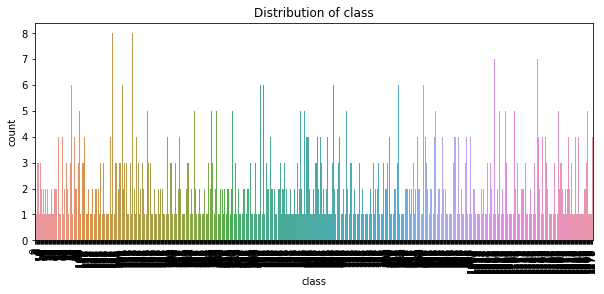

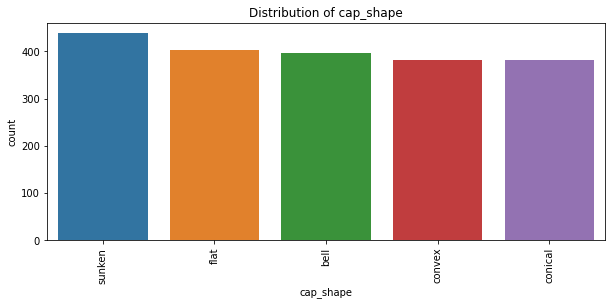

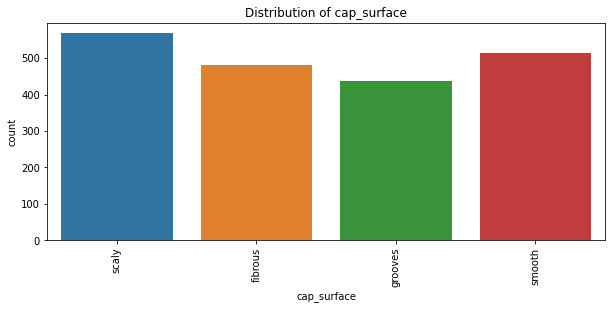

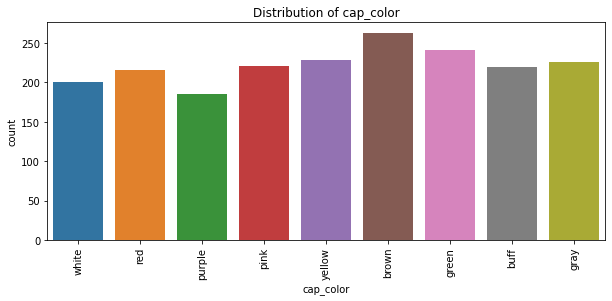

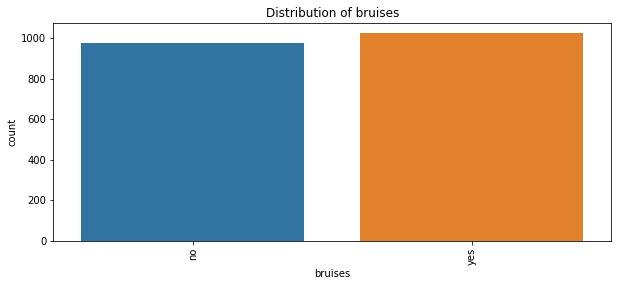

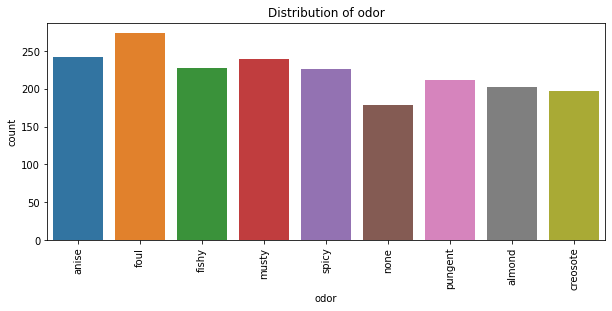

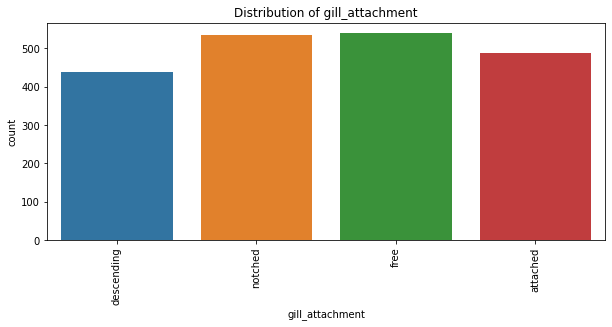

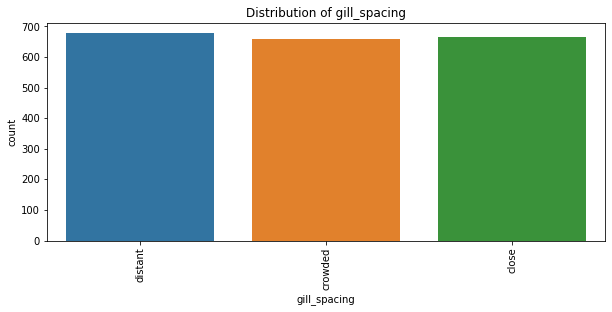

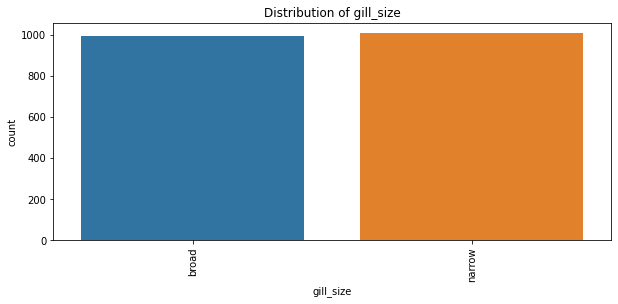

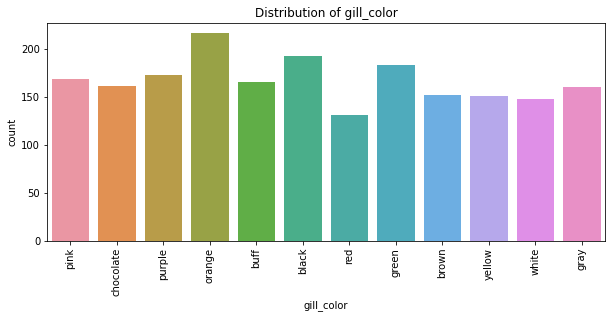

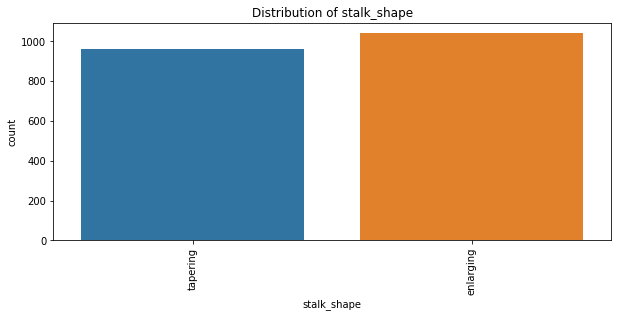

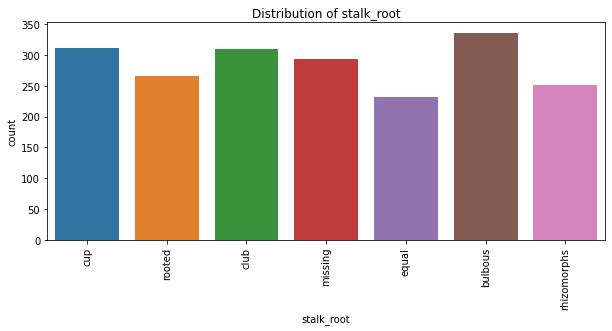

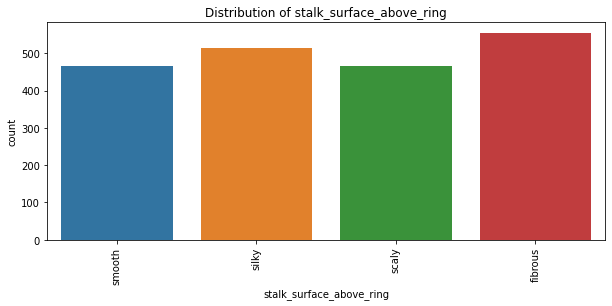

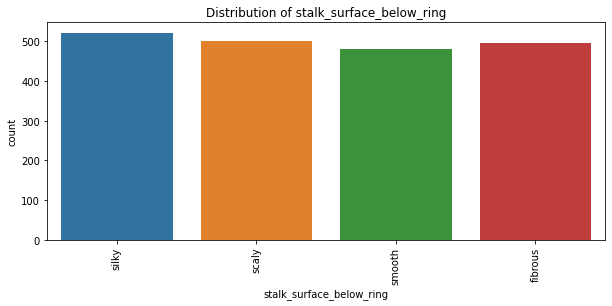

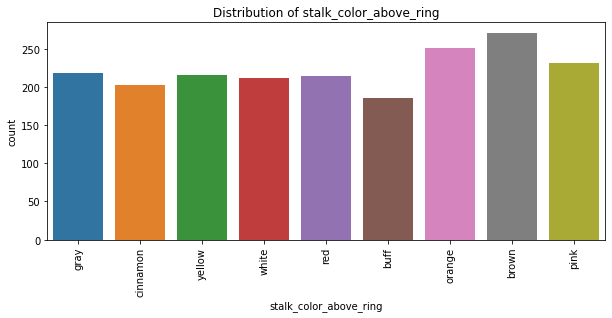

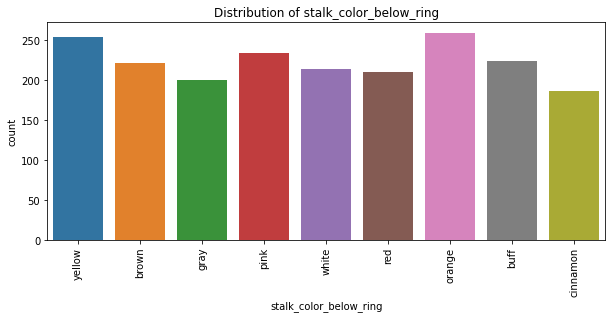

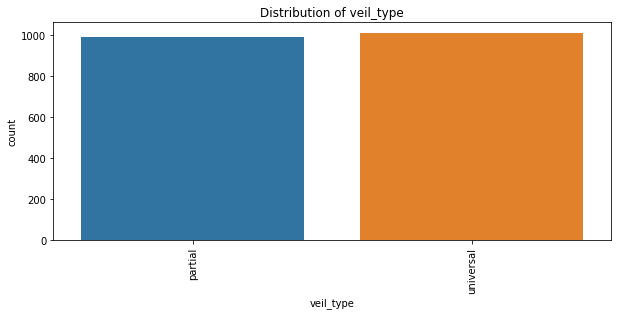

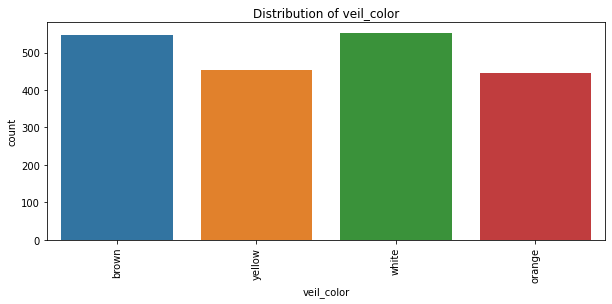

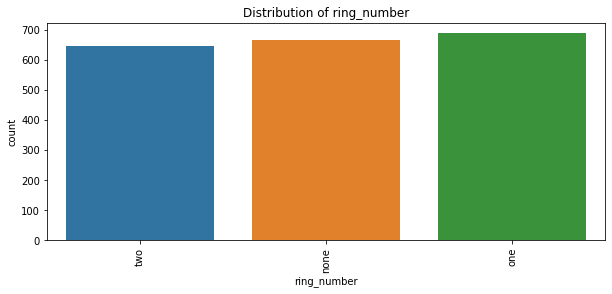

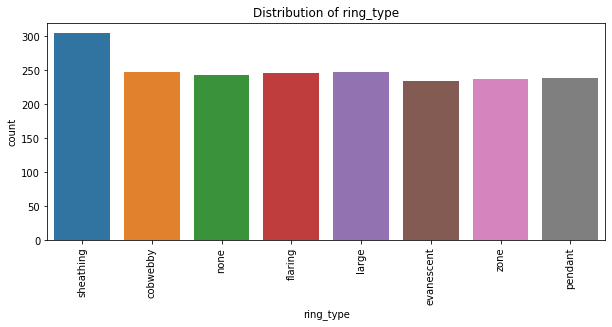

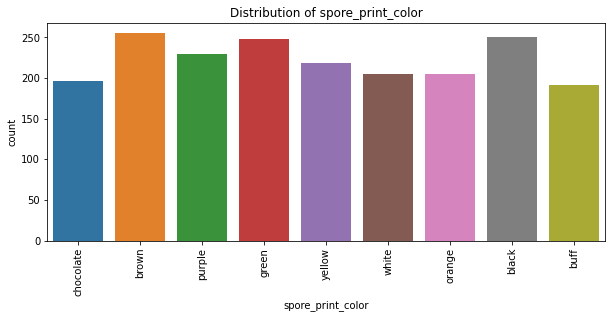

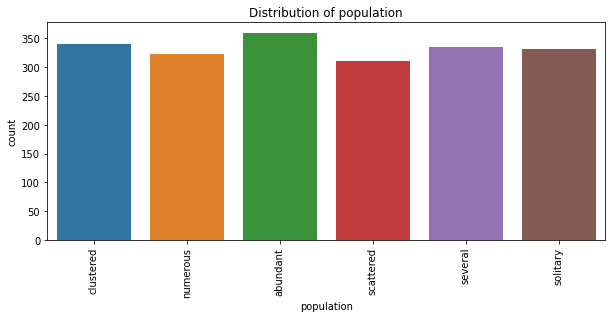

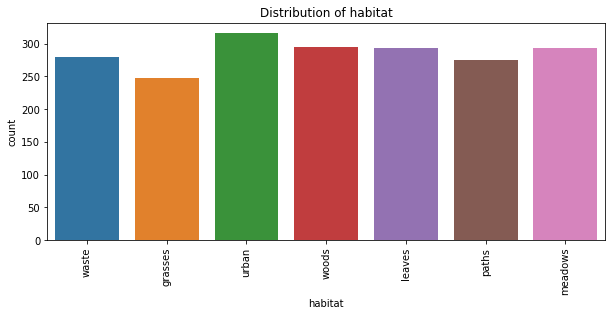

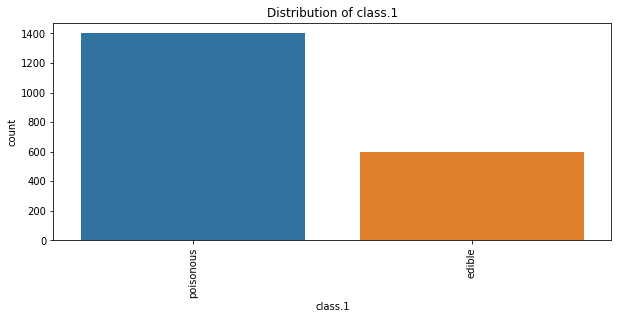

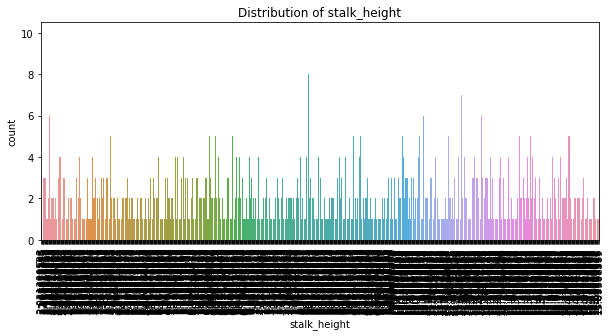

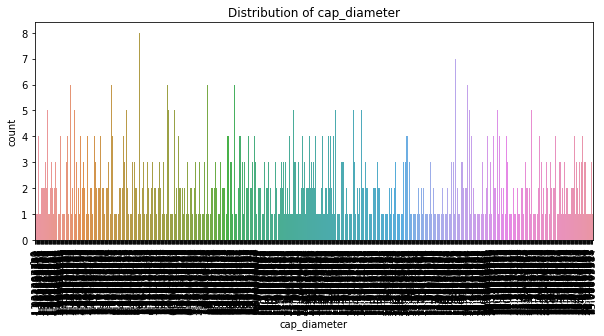

In [8]:
# Plot histograms for each categorical feature
for column in mushrooms.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=mushrooms)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [9]:
from scipy.stats import chi2_contingency

In [10]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return (chi2 / (n * (min(r, k) - 1))) ** 0.5

In [11]:
correlations = pd.DataFrame(index=mushrooms.columns, columns=mushrooms.columns)
for col1 in mushrooms.columns:
    for col2 in mushrooms.columns:
        correlations.loc[col1, col2] = cramers_v(mushrooms[col1], mushrooms[col2])

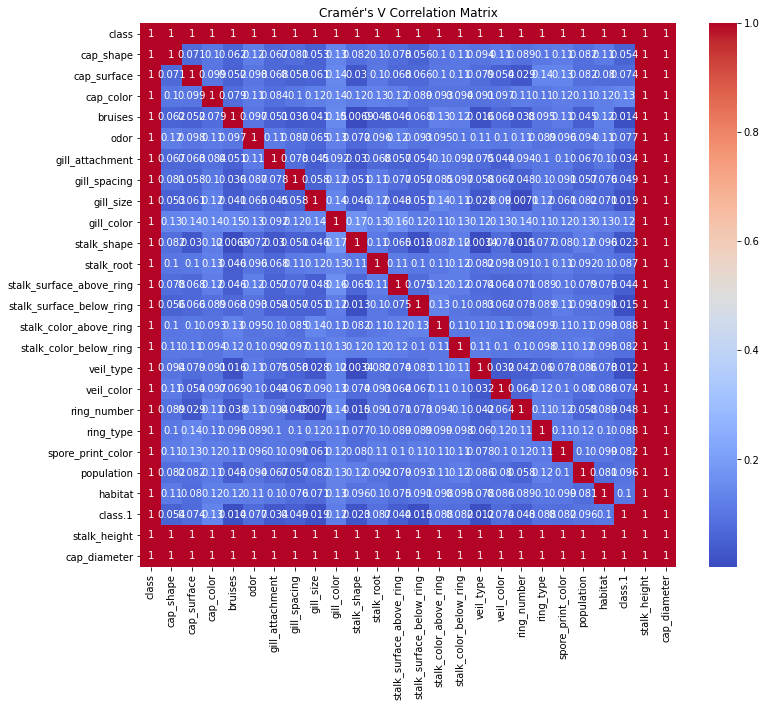

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlations.astype(float), annot=True, cmap='coolwarm')
plt.title('Cramér\'s V Correlation Matrix')
plt.show()

### Task 2: Data Preprocessing

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
mushrooms_encoded = encoder.fit_transform(mushrooms)

In [14]:
from sklearn.model_selection import train_test_split

X = mushrooms_encoded[:, 1:]  # features
y = mushrooms_encoded[:, 0]   # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Task 3: Data Visualization

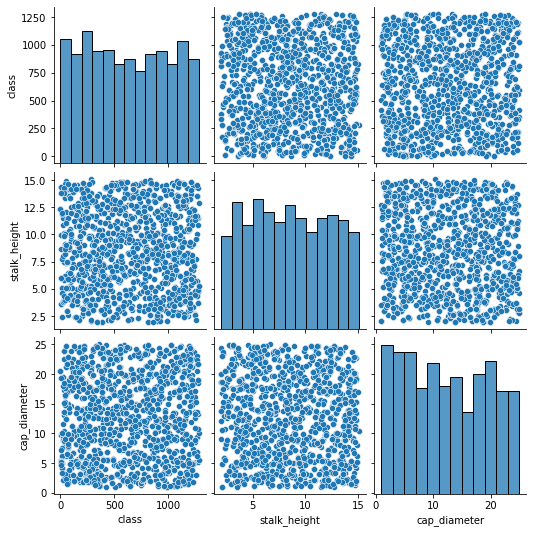

In [15]:
sns.pairplot(mushrooms)
plt.show()

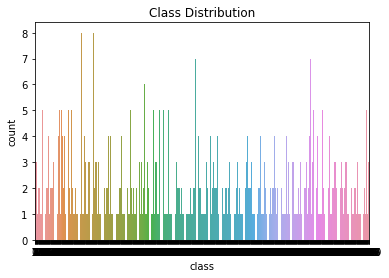

In [16]:
sns.countplot(x='class', data=mushrooms)
plt.title('Class Distribution')
plt.show()

### Task 4: SVM Implementation

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
y_pred = svm.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)  # assuming 0 is the positive class
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)

In [21]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


### Task 5: Visualization of SVM Results

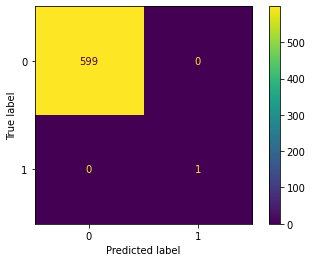

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Task 6: Parameter Tuning and Optimization

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # for polynomial kernel
    'gamma': ['scale', 'auto']  # for rbf and sigmoid kernels
}

In [26]:
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [27]:
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 1.0


### Task 7: Comparison and Analysis

In [28]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f'Kernel: {kernel}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, pos_label=0)}')
    print(f'Recall: {recall_score(y_test, y_pred, pos_label=0)}')
    print(f'F1-Score: {f1_score(y_test, y_pred, pos_label=0)}')
    print('---')

Kernel: linear
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
---
Kernel: poly
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
---
Kernel: rbf
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
---
Kernel: sigmoid
Accuracy: 0.9983333333333333
Precision: 0.9983333333333333
Recall: 1.0
F1-Score: 0.9991659716430359
---
